
##EDA



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import seaborn as sns
sns.set(font_scale=1.5, style="whitegrid")

In [2]:
df = pd.read_csv('/content/data_file.txt', sep="\t")
print(df.head())
print(df.shape)

     # STATION                     STATION_NAME  ELEVATION  LATITUDE  \
0  COOP:352709  EUGENE MAHLON SWEET FIELD OR US      107.6  44.12778   
1  COOP:352709  EUGENE MAHLON SWEET FIELD OR US      107.6  44.12778   
2  COOP:352709  EUGENE MAHLON SWEET FIELD OR US      107.6  44.12778   
3  COOP:352709  EUGENE MAHLON SWEET FIELD OR US      107.6  44.12778   
4  COOP:352709  EUGENE MAHLON SWEET FIELD OR US      107.6  44.12778   

   LONGITUDE            DATE  HPCP(cm)  
0 -123.22056  20000101 01:00      0.00  
1 -123.22056  20000101 02:00      0.00  
2 -123.22056  20000101 05:00      0.00  
3 -123.22056  20000101 06:00      0.00  
4 -123.22056  20000101 08:00      0.51  
(23839, 7)


In [3]:
#Access the 7th column (index 6) using .iloc[] for integer-based indexing
mean = np.mean(df.iloc[:, 6])
std = np.std(df.iloc[:, 6])
print("Mean= ", mean)
print("Standard Deviation:0 ", std)

Mean=  0.532994253114644
Standard Deviation:0  0.9557358610652827


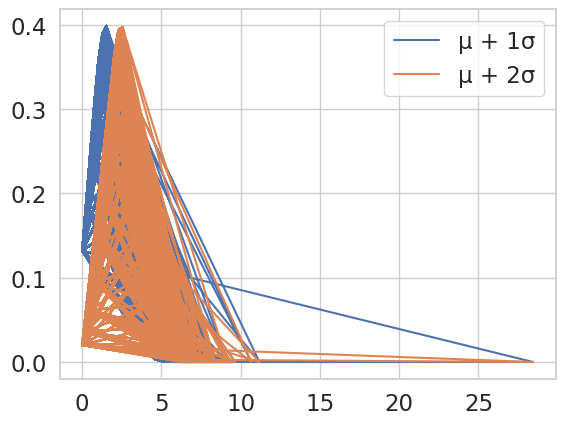

In [4]:
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.plot(df.iloc[:, 6], norm.pdf(df.iloc[:, 6], mean + std), label='μ + 1σ')
plt.plot(df.iloc[:, 6], norm.pdf(df.iloc[:, 6], mean + 2 * std), label='μ + 2σ')
plt.legend()
plt.show()

In [5]:
df = np.genfromtxt('/content/data_file.txt', delimiter="\t", dtype=None, encoding=None, names=True) # Load data with column names
# Convert the NumPy ndarray to a Pandas DataFrame
df = pd.DataFrame(df)  # This line converts the structured array to a DataFrame

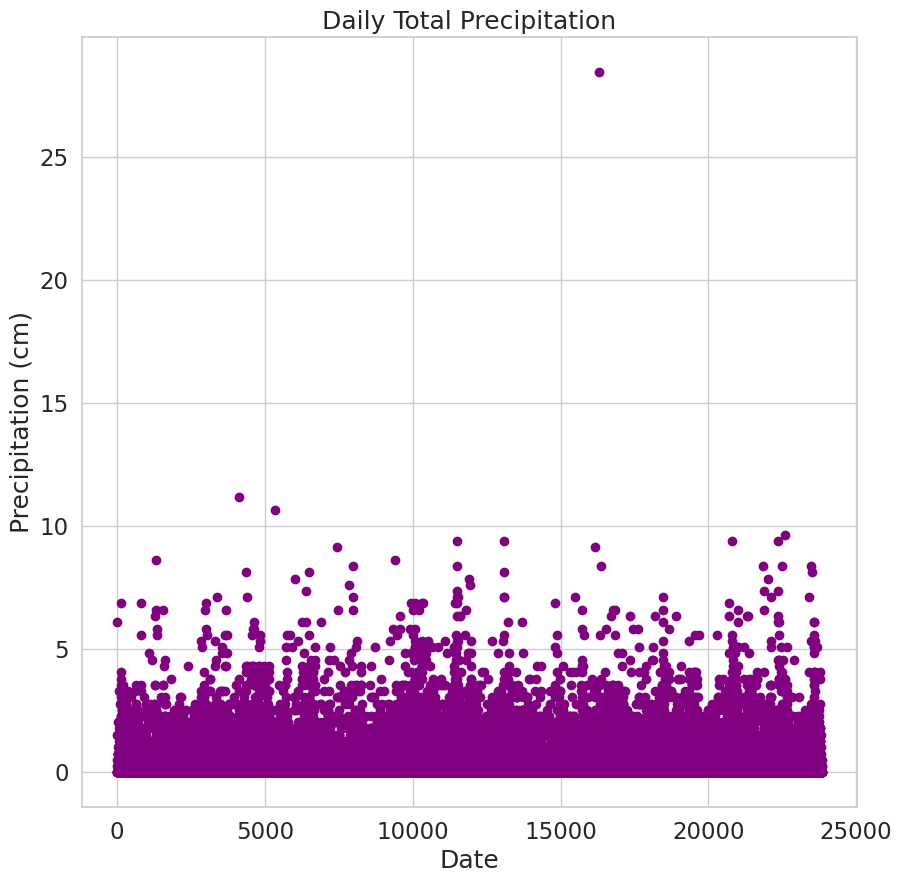

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(df.index.values,df["HPCPcm"],color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (cm)",
       title="Daily Total Precipitation")

plt.show()

Se modifica el formato de fecha:     Se convierte una cadena de fecha y hora en formato 'YYYYMMDD HH:MM' a un valor numérico.

In [7]:
# Importa la biblioteca pandas si aún no lo has hecho
import pandas as pd

# Crea una nueva columna 'NUMERIC_DATE' con la fecha convertida a numérica
df['NUMERIC_DATE'] = pd.to_numeric(df['DATE'].str.replace(' ', '').str.replace(':', ''))
df

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCPcm,NUMERIC_DATE
0,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20000101 01:00,0.00,200001010100
1,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20000101 02:00,0.00,200001010200
2,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20000101 05:00,0.00,200001010500
3,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20000101 06:00,0.00,200001010600
4,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20000101 08:00,0.51,200001010800
...,...,...,...,...,...,...,...,...
23834,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12780,-123.22060,20131223 09:00,0.25,201312230900
23835,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12780,-123.22060,20131223 12:00,0.00,201312231200
23836,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12780,-123.22060,20131223 13:00,0.00,201312231300
23837,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12780,-123.22060,20131223 19:00,0.51,201312231900


Nuevo grafico de Precipitación Vs Fechas Numericas

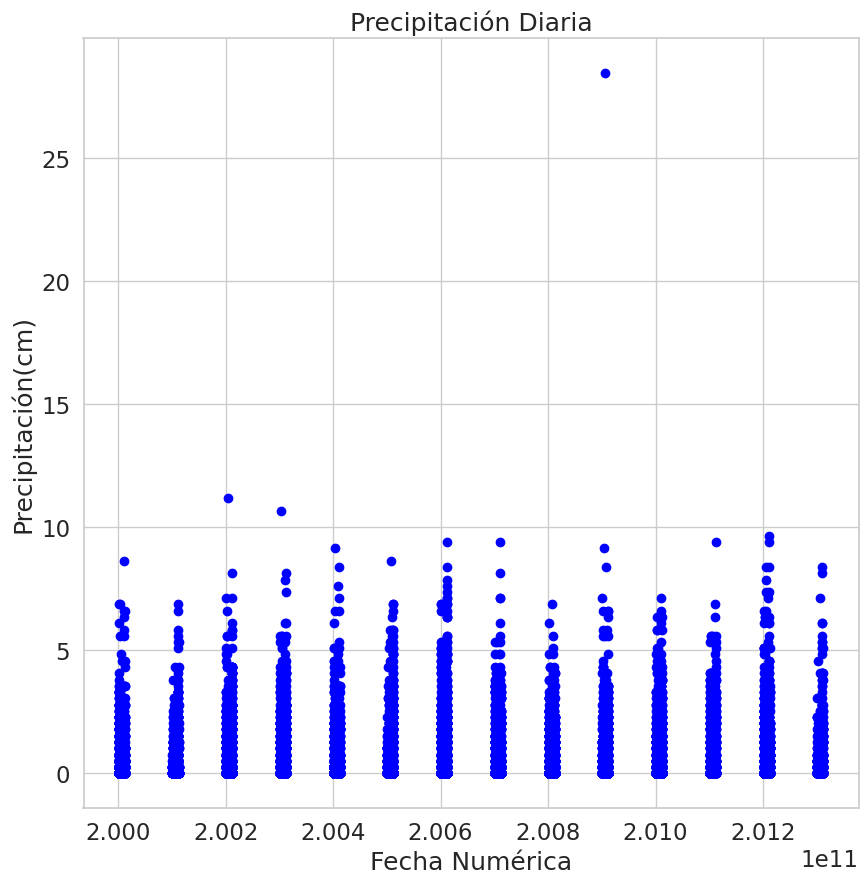

In [8]:
import matplotlib.pyplot as plt

# Crea el scatter plot
plt.figure(figsize=(10, 10))  # Ajusta el tamaño de la figura si lo necesitas
plt.scatter(df['NUMERIC_DATE'], df['HPCPcm'], color='blue', marker='o')

# Configura los ejes y el título
plt.xlabel('Fecha Numérica')
plt.ylabel('Precipitación(cm)')
plt.title('Precipitación Diaria')

# Muestra el gráfico
plt.show()

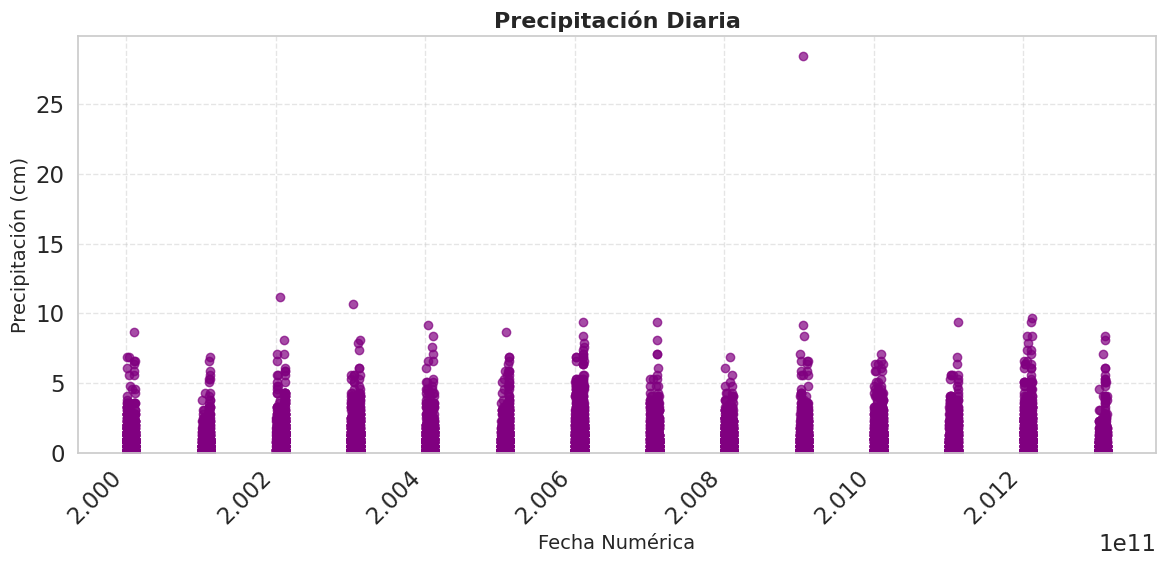

In [9]:
import matplotlib.pyplot as plt

# Crea el scatter plot
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura para mejor visibilidad
plt.scatter(df['NUMERIC_DATE'], df['HPCPcm'], color='purple', marker='o', alpha=0.7)
# alpha para transparencia, facilita ver la densidad de puntos

# Configura los ejes y el título con mayor tamaño y estilo
plt.xlabel('Fecha Numérica', fontsize=14)
plt.ylabel('Precipitación (cm)', fontsize=14)
plt.title('Precipitación Diaria', fontsize=16, fontweight='bold')

# Ajusta los límites del eje y si es necesario para evitar puntos muy pegados al borde
plt.ylim(bottom=0)  # Por ejemplo, para asegurar que la precipitación no sea negativa

# Agrega una cuadrícula para facilitar la lectura
plt.grid(True, linestyle='--', alpha=0.5)  # Estilo y transparencia de la cuadrícula

# Rota las etiquetas del eje x si es necesario para evitar superposiciones
plt.xticks(rotation=45, ha='right')  # Rota 45 grados y alinea a la derecha

# Muestra el gráfico
plt.tight_layout()  # Ajusta automáticamente los elementos para evitar superposiciones
plt.show()

Se modifica el formato fecha y la precipitacion se da en mm